In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#Prepare dataframes for the testing.
#---------------------------------------------------------------------


In [3]:
# Upload Dataframes:
startEvtmc = 0
stopEvtmc  = 2000000
qr_mc= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
startEvtdata = 0
stopEvtdata  = 2000000
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016H[1])
dfmc= qr_mc.getDF()
dfdata=qr_data.getDF()

NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9
number of events: 7073020
# lead eleMatch    =  6081954
# sublead eleMatch =  5528292
MC Sublead
lead size:  6081954
MC Lead
sublead size:  5528292
Count final dataset
11610246
Apply basic selection
 ptmin  =  25.0 
 ptmax  =  150.0  
 etamin =  -2.5  
 etamax =  2.5  
 phimin =  -3.14  
 phimax =  3.14
Reshuffle events rndm seed  =  12345
Selecting events   [ 0 ,  2000000 ]  out of  11554791
DataFrame size =  2000000
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9
number of events: 15355385
Cou

In [10]:
dfmc   = dfmc  .query('(mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfdata   = dfdata  .query('(mass > 70 and mass < 110)  and (ChIso03 < 5)')
dfmcEB= dfmc.query('-1.444 < ScEta & ScEta <1.444 & (R9> 0.8 & R9 <1.0) ')
dfmcEE= dfmc.query('(ScEta < -1.57 | ScEta >1.57) & (R9> 0.8 & R9 <1.0) ')
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444 & (R9> 0.8 & R9 <1.0) ') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('(ScEta < -1.57 | ScEta >1.57) & (R9> 0.8 & R9 <1.0) ') # ('abs(ScEta)>1.57')
print len(dfmc.index),len(dfdata.index)

1920498 1855493


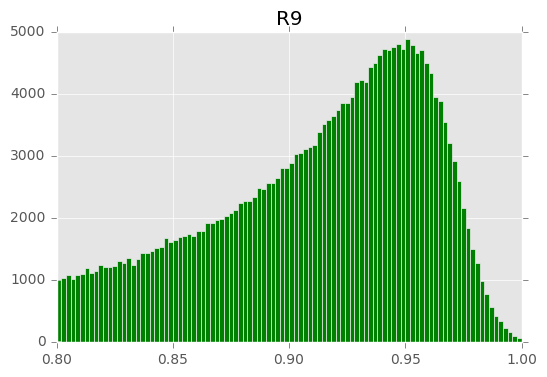

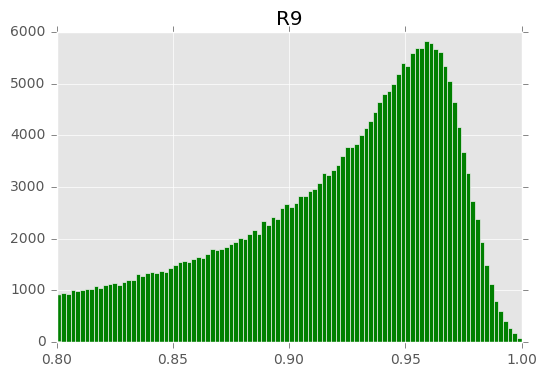

In [11]:
h = dfdataEE.hist('R9', bins=100, alpha = 1, color='g')
h = dfmcEE.hist('R9', bins=100, alpha = 1, color='g')

In [ ]:
rv=np.arange(0.8,1.,0.003)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
#Do the Ratio wrt the last 
plot.plotHistErr(dfmcEE["R9"], rv, Color="b", Weight=dfmcEE["weight"])
plot.plotHistErr(dfdataEE["R9"], rv, Color="r", Weight=dfdataEE["weight"])
ax.set_title('R9')

In [12]:
#insert run period into dataframe
#create vector of run periods with the ends of each one.:
runPeriod=[272006,276812,277420,278810,280386,284046]
dfdata['runperiod'] = np.digitize(dfdata['run'],runPeriod)

In [13]:
#create fake runperiod for mc.
#Assign weighted runperiod to MC
vecPeriod=np.array([len(dfdata.query("runperiod==1").index),
          len(dfdata.query("runperiod==2").index),
          len(dfdata.query("runperiod==3").index),
          len(dfdata.query("runperiod==4").index),
          len(dfdata.query("runperiod==5").index)])
print vecPeriod
vecPeriod=vecPeriod/float(vecPeriod.sum())
print vecPeriod
period=np.array([0,
                 vecPeriod[0],
                 vecPeriod[0]+vecPeriod[1],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3]+vecPeriod[4]+0.1])
print period
dfmc["runperiod"]=np.digitize(np.random.rand(len(dfmc.index)),period)
vecPeriod=np.array([len(dfmc.query("runperiod==1").index),
          len(dfmc.query("runperiod==2").index),
          len(dfmc.query("runperiod==3").index),
          len(dfmc.query("runperiod==4").index),
          len(dfmc.query("runperiod==5").index)])
print vecPeriod

[671414 201914 154309 390785 437071]
[ 0.36185208  0.1088196   0.08316334  0.21060979  0.23555519]
[ 0.          0.36185208  0.47067168  0.55383502  0.76444481  1.1       ]
[695087 209162 160326 403962 451961]


In [14]:
dfdata1   = dfdata  .query('runperiod==1').reset_index()  
dfdata2   = dfdata  .query('runperiod==2').reset_index()  
dfdata3   = dfdata  .query('runperiod==3').reset_index()  
dfdata4   = dfdata  .query('runperiod==4').reset_index()  
dfdata5   = dfdata  .query('runperiod==5').reset_index() 
dfmc1   = dfmc  .query('runperiod==1').reset_index()  
dfmc2   = dfmc  .query('runperiod==2').reset_index()  
dfmc3   = dfmc  .query('runperiod==3').reset_index()  
dfmc4   = dfmc  .query('runperiod==4').reset_index()  
dfmc5   = dfmc  .query('runperiod==5').reset_index()
rv=np.arange(0,40,0.4)

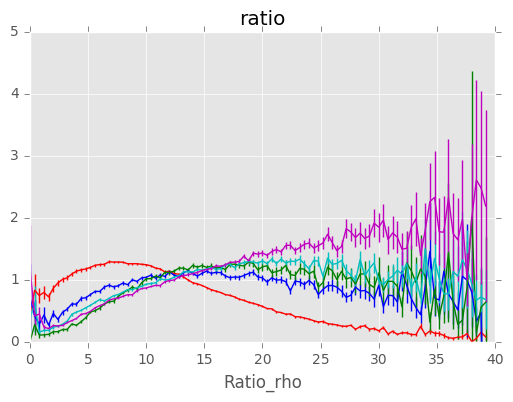

In [15]:
rv=np.arange(0,40,0.4)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

#Do the Ratio wrt the last 
plot.plotHistRatio(dfdata1.loc[:,"rho"],dfmc1.loc[:,"rho"],rv, Color="r",Weight2=dfmc1["weight"])
plot.plotHistRatio(dfdata2.loc[:,"rho"],dfmc2.loc[:,"rho"],rv, Color="b",Weight2=dfmc2["weight"])
plot.plotHistRatio(dfdata3.loc[:,"rho"],dfmc3.loc[:,"rho"],rv, Color="g",Weight2=dfmc3["weight"])
plot.plotHistRatio(dfdata4.loc[:,"rho"],dfmc4.loc[:,"rho"],rv, Color="c",Weight2=dfmc4["weight"])
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfmc5.loc[:,"rho"],rv, Color="m",Weight2=dfmc5["weight"])
ax.set_ylim([0,5])

ax.set_title('ratio')

1855493 1920498


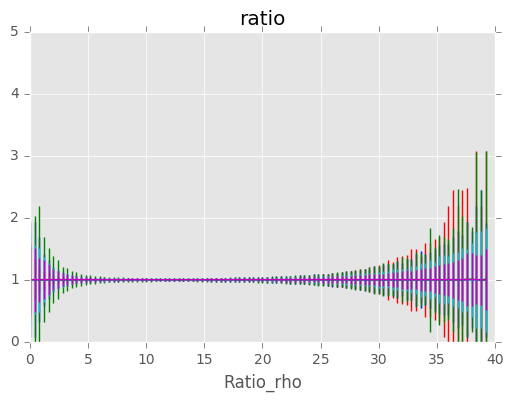

In [16]:
import pandas as pd
ratiomc1,edge,ratiodataErrG= plot.getHistRatio(dfdata1.loc[:,"rho"],dfmc1.loc[:,"rho"],rv,Weight2=dfmc1["weight"])
ratiomc2,edge,ratiodataErrG= plot.getHistRatio(dfdata2.loc[:,"rho"],dfmc2.loc[:,"rho"],rv,Weight2=dfmc2["weight"])
ratiomc3,edge,ratiodataErrG= plot.getHistRatio(dfdata3.loc[:,"rho"],dfmc3.loc[:,"rho"],rv,Weight2=dfmc3["weight"])
ratiomc4,edge,ratiodataErrG= plot.getHistRatio(dfdata4.loc[:,"rho"],dfmc4.loc[:,"rho"],rv,Weight2=dfmc4["weight"])
ratiomc5,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc5.loc[:,"rho"],rv,Weight2=dfmc5["weight"])

dfmc1['bin'] = np.digitize(dfmc1['rho'],edge)
dfmc1["weight"]=dfmc1["weight"]*ratiomc1[dfmc1['bin'].values-1]

dfmc2['bin'] = np.digitize(dfmc2['rho'],edge)
dfmc2["weight"]=dfmc2["weight"]*ratiomc2[dfmc2['bin'].values-1]

dfmc3['bin'] = np.digitize(dfmc3['rho'],edge)
dfmc3["weight"]=dfmc3["weight"]*ratiomc3[dfmc3['bin'].values-1]

dfmc4['bin'] = np.digitize(dfmc4['rho'],edge)
dfmc4["weight"]=dfmc4["weight"]*ratiomc4[dfmc4['bin'].values-1]

dfmc5['bin'] = np.digitize(dfmc5['rho'],edge)
dfmc5["weight"]=dfmc5["weight"]*ratiomc5[dfmc5['bin'].values-1]

#cut some infinities:

dfmc1=dfmc1.query("weight<1000")
dfmc2=dfmc2.query("weight<1000")
dfmc3=dfmc3.query("weight<1000")
dfmc4=dfmc4.query("weight<1000")
dfmc5=dfmc5.query("weight<1000")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

#Do the Ratio wrt the last 
plot.plotHistRatio(dfdata1.loc[:,"rho"],dfmc1.loc[:,"rho"],rv, Color="r",Weight2=dfmc1["weight"])
plot.plotHistRatio(dfdata2.loc[:,"rho"],dfmc2.loc[:,"rho"],rv, Color="b",Weight2=dfmc2["weight"])
plot.plotHistRatio(dfdata3.loc[:,"rho"],dfmc3.loc[:,"rho"],rv, Color="g",Weight2=dfmc3["weight"])
plot.plotHistRatio(dfdata4.loc[:,"rho"],dfmc4.loc[:,"rho"],rv, Color="c",Weight2=dfmc4["weight"])
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfmc5.loc[:,"rho"],rv, Color="m",Weight2=dfmc5["weight"])
ax.set_ylim([0,5])

ax.set_title('ratio')
#concatenate dataFrames into one
frame1 = [dfmc1, dfmc2, dfmc3, dfmc4,dfmc5]
dfmc = pd.concat(frame1).sample(frac=1).reset_index(drop=True) 
print len(dfdata.index),len(dfmc.index)

In [17]:
dfmc   = dfmc  .query('(mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfdata   = dfdata  .query('(mass > 70 and mass < 110)  and (ChIso03 < 5)')
dfmcEB= dfmc.query('-1.444 < ScEta & ScEta <1.444 & (R9> 0.8 & R9 <1.0) ')
dfmcEE= dfmc.query('(ScEta < -1.57 | ScEta >1.57) & (R9> 0.8 & R9 <1.0) ')
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444 & (R9> 0.8 & R9 <1.0) ') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('(ScEta < -1.57 | ScEta >1.57) & (R9> 0.8 & R9 <1.0) ') # ('abs(ScEta)>1.57')
print len(dfmc.index),len(dfdata.index)

1920498 1855493


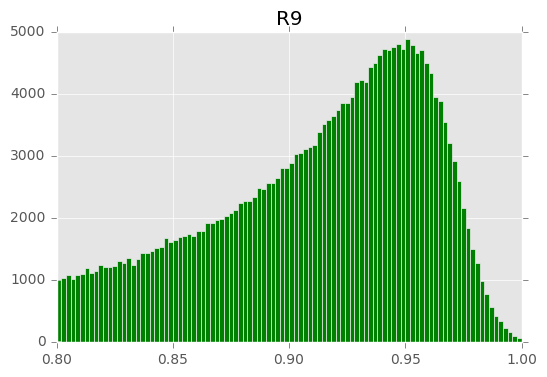

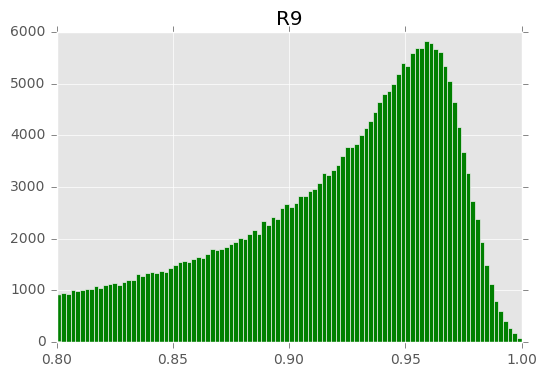

In [18]:
h = dfdataEE.hist('R9', bins=100, alpha = 1, color='g')
h = dfmcEE.hist('R9', bins=100, alpha = 1, color='g')

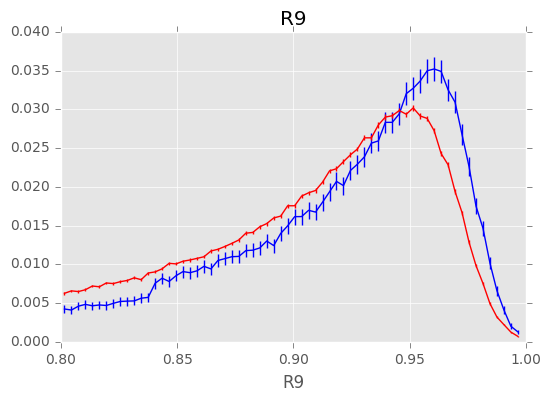

In [25]:
rv=np.arange(0.8,1.,0.003)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
#Do the Ratio wrt the last 
plot.plotHistErr(dfmcEE["R9"], rv, Color="b", Weight=dfmcEE["weight"])
plot.plotHistErr(dfdataEE["R9"], rv, Color="r", Weight=dfdataEE["weight"])
ax.set_title('R9')